## Main file

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from preprocessing.cleaner import convert_cat_to_num,missing_value
from preprocessing.test import test as p_test
from preprocessing.label import label_encoder
from preprocessing.split import split
from preprocessing.feature_reduction import plot_2D
from visualization.maps import heatmap, nan_map
from visualization.data_overview import numeric_features_distribution, numeric_features_distribution_per_class
from sklearn.svm import SVC
from training.hyperparameters_tuning import hyperparameters_tuning
from training.train_models import train_models
from training.evaluation import cla_evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from preprocessing.normalization import normalization

### Kidney disease

In [14]:
TARGET_NAME = "class"
DATA_NAME = "kidney"
FEATURES = ["id","age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]
import json
with open("settings.json") as file:
            settings = json.load(file) # Retrieve paths 

sns.set_style("darkgrid")

In [15]:
# Preprocessing
data = pd.read_csv(settings["paths"][DATA_NAME])                    # Read the csv file
clean_data_1 = convert_cat_to_num(data,FEATURES)                    # Convert object datatype to float when its possible
clean_data_2 = missing_value(clean_data_1,drop_num=True)            # Fill the missing values
p_test(clean_data_2,data)                                           # Test the length of data after cleaning process
numerical_features = clean_data_2.select_dtypes(include=np.number).columns
normalized_data = normalization(clean_data_2,features = numerical_features,mode=0) #Data normalization for numerical features
label_data,label_dico = label_encoder(normalized_data)                 # Encode strings data
X_train, X_test, y_train, y_test = split(label_data,TARGET_NAME)

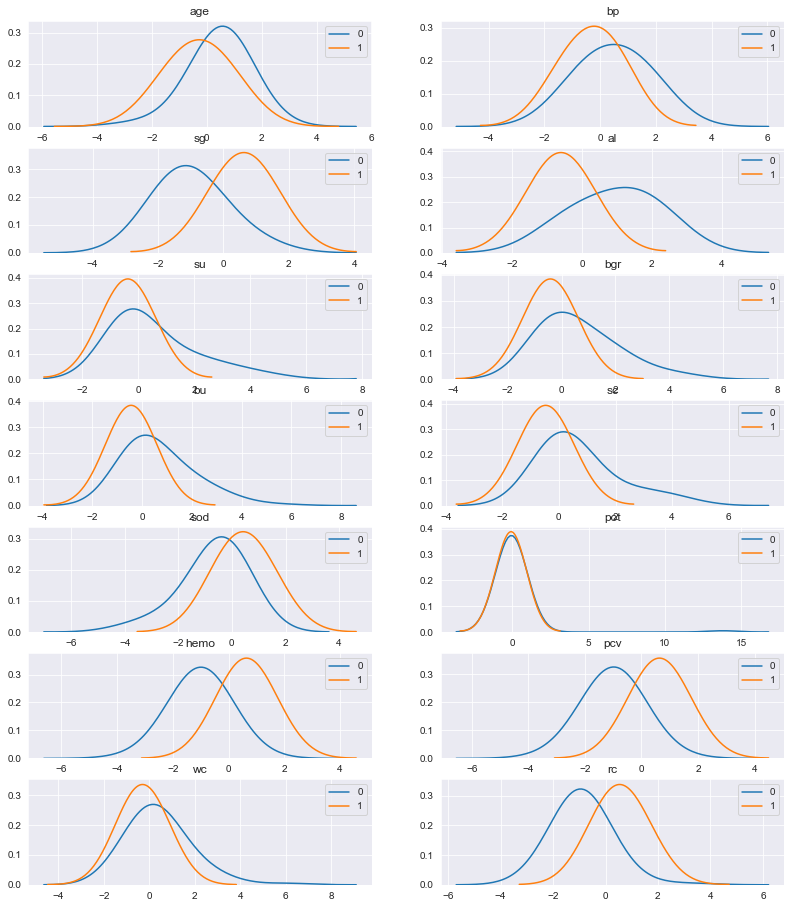

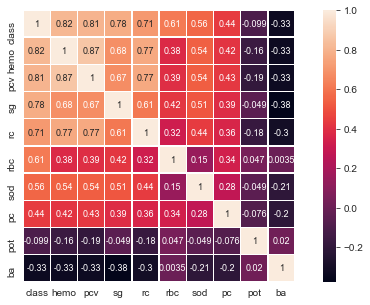

In [16]:
# Vizualisation
numeric_features_distribution_per_class(data, numerical_features,TARGET_NAME,bandwith = 1)
heatmap(clean_data_2,TARGET_NAME) #Study correlation between features and data

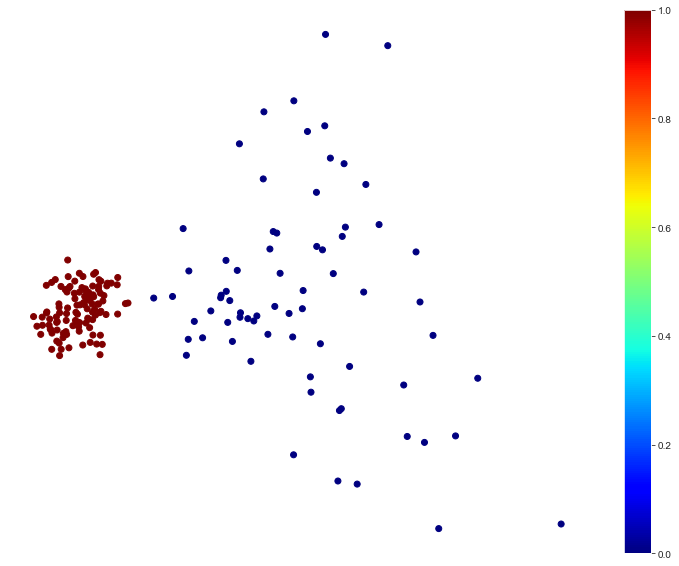

In [17]:
#2D Visulaization using PCA

plot_2D(X_train,y_train)

In [18]:
## Models + Training
# SVC
svm = SVC(C=10,kernel="radius")
parameters_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
logs_svm, best_svm = hyperparameters_tuning(svm,parameters_svc,X_train,y_train,cv=5)

# RFC
rfc = RandomForestClassifier(n_estimators=100,max_depth=20)
parameters_rfc = {"n_estimators":[50,100,150],"max_depth":[10,20,30,None]}
logs_rfc, best_rfc = hyperparameters_tuning(rfc,parameters_rfc,X_train,y_train,cv=5)

# ABC
abc = AdaBoostClassifier(n_estimators=100)
parameters_abc = {"n_estimators":[50,100,150]}
logs_abc, best_abc = hyperparameters_tuning(abc,parameters_abc,X_train,y_train,cv=5)

#Trained Models
Models = {"SVM":best_svm,"RFC":best_rfc,"ABC":best_abc}


Best combination of parameters is : {'C': 1, 'kernel': 'rbf'}
Best combination of parameters is : {'max_depth': 30, 'n_estimators': 50}
Best combination of parameters is : {'n_estimators': 100}


In [19]:
logs_svm

{"{'C': 1, 'kernel': 'linear'}": 0.9945945945945945,
 "{'C': 1, 'kernel': 'rbf'}": 1.0,
 "{'C': 10, 'kernel': 'linear'}": 0.9945945945945945,
 "{'C': 10, 'kernel': 'rbf'}": 0.9945945945945945}

In [20]:
for name,m in Models.items():
    print(f"Accuracy of {name}")
    cla_evaluation(m,X_test,y_test)

Accuracy of SVM
[[ 8  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy of RFC
[[ 8  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy of ABC
[[ 7  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.93      1.00      0.96        13

    accuracy                           0.95        21
   macro avg       0.96

### Banknote

In [21]:
TARGET_NAME = "class"
DATA_NAME = "banknote"
FEATURES = ["variance","skewness","curtosis","entropy"]
import json
with open("settings.json") as file:
            settings = json.load(file) # Retrieve paths 

In [22]:
# Preprocessing
data = pd.read_csv(settings["paths"][DATA_NAME])                    # Read the csv file
clean_data_1 = convert_cat_to_num(data,FEATURES)                    # Convert object datatype to float when its possible
clean_data_2 = missing_value(clean_data_1,drop_num=True)            # Fill the missing values
p_test(clean_data_2,data)                                           # Test the length of data after cleaning process
numerical_features = clean_data_2.select_dtypes(include=np.number).columns
normalized_data = normalization(clean_data_2,numerical_features,mode=0) #Data normalization for numerical features
label_data,label_dico = label_encoder(normalized_data)                 # Encode strings data
X_train, X_test, y_train, y_test = split(label_data,TARGET_NAME)

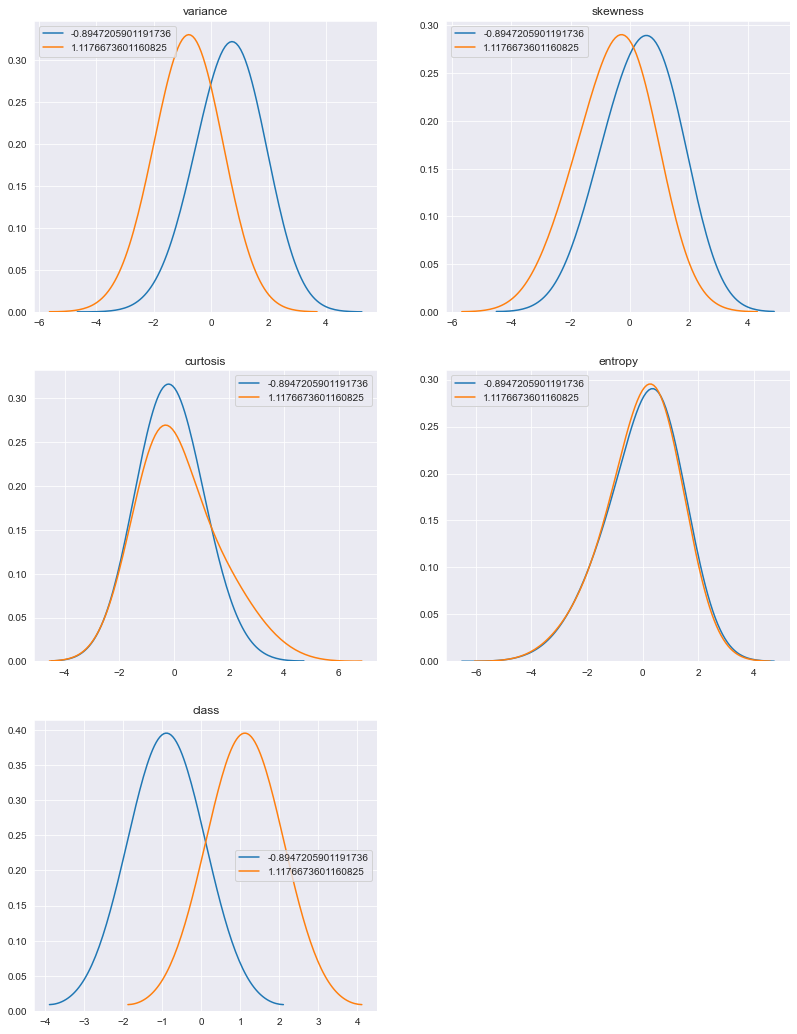

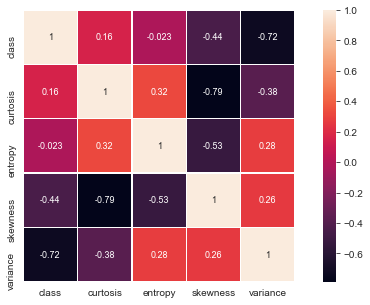

In [23]:
# Vizualisation
numeric_features_distribution_per_class(data, numerical_features,TARGET_NAME,bandwith = 1)
heatmap(clean_data_2,TARGET_NAME) #Study correlation between features and data

In [24]:
## Models + Training
# SVC
svm = SVC(C=10,kernel="radius")
parameters_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
logs_svm, best_svm = hyperparameters_tuning(svm,parameters_svc,X_train,y_train,cv=5)

# RFC
rfc = RandomForestClassifier(n_estimators=100,max_depth=20)
parameters_rfc = {"n_estimators":[50,100,150],"max_depth":[10,20,30,None]}
logs_rfc, best_rfc = hyperparameters_tuning(rfc,parameters_rfc,X_train,y_train,cv=5)

# ABC
abc = AdaBoostClassifier(n_estimators=100)
parameters_abc = {"n_estimators":[50,100,150]}
logs_abc, best_abc = hyperparameters_tuning(abc,parameters_abc,X_train,y_train,cv=5)

#Trained Models
Models = {"SVM":best_svm,"RFC":best_rfc,"ABC":best_abc}

D:\Users\Giraud-Alexandre\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Users\Giraud-Alexandre\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\Giraud-Alexandre\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "D:\Users\Giraud-Alexandre\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 544, in _validate_targets
    check_classification_targets(y)
  File "D:\Users\Giraud-Alexandre\Anaconda\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed

ValueError: Unknown label type: 'continuous'

In [25]:
logs_rfc

{"{'max_depth': 10, 'n_estimators': 50}": 0.9945945945945945,
 "{'max_depth': 10, 'n_estimators': 100}": 0.9945945945945945,
 "{'max_depth': 10, 'n_estimators': 150}": 0.9945945945945945,
 "{'max_depth': 20, 'n_estimators': 50}": 0.9891891891891891,
 "{'max_depth': 20, 'n_estimators': 100}": 0.9891891891891891,
 "{'max_depth': 20, 'n_estimators': 150}": 0.9945945945945945,
 "{'max_depth': 30, 'n_estimators': 50}": 1.0,
 "{'max_depth': 30, 'n_estimators': 100}": 1.0,
 "{'max_depth': 30, 'n_estimators': 150}": 0.9945945945945945,
 "{'max_depth': None, 'n_estimators': 50}": 0.9945945945945945,
 "{'max_depth': None, 'n_estimators': 100}": 1.0,
 "{'max_depth': None, 'n_estimators': 150}": 0.9945945945945945}

In [26]:
for name,m in Models.items():
    print(f"Accuracy of {name}")
    cla_evaluation(m,X_test,y_test)

Accuracy of SVM


ValueError: X.shape[1] = 4 should be equal to 24, the number of features at training time